In [ ]:
# latest qiskit 1.0
!pip install qiskit
!pip install qiskit-ibm-provider

In [ ]:
# Useful additional packages
import gym
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
from qiskit import transpile
from qiskit.circuit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit.providers.basic_provider import BasicSimulator

import math
from qiskit import *
import numpy as np
from numpy import linalg as la
import numpy as np


In [ ]:
env_name = 'Acrobot-v1'

# Create SVQC's
def Quantum_circuit(state):
    # state is a list of angles
    # Ry gate phase are trainalbe parameters in quantum circuit
    qc_0 = QuantumCircuit(1)
    qc_0.h(0)
    qc_0.ry(state[0],[0])
    qc_0.rz(state[0],[0])
    qc_0.ry(-0.16335,[0])
    qc_0.measure_all()

    qc_1 = QuantumCircuit(1)
    qc_1.h(0)
    qc_1.ry(state[1],[0])
    qc_1.rz(state[1],[0])
    qc_1.ry(-0.05051,[0])
    qc_1.measure_all()

    qc_2 = QuantumCircuit(1)
    qc_2.h(0)
    qc_2.ry(state[2],[0])
    qc_2.rz(state[2],[0])
    qc_2.ry(-0.57672985,[0])
    qc_2.measure_all()

    qc_3 = QuantumCircuit(1)
    qc_3.h(0)
    qc_3.ry(state[3],[0])
    qc_3.rz(state[3],[0])
    qc_3.ry(-0.23163,[0])
    qc_3.measure_all()

    qc_4 = QuantumCircuit(1)
    qc_4.h(0)
    qc_4.ry(state[4],[0])
    qc_4.rz(state[4],[0])
    qc_4.ry(-0.42348,[0])
    qc_4.measure_all()

    qc_5 = QuantumCircuit(1)
    qc_5.h(0)
    qc_5.ry(state[5],[0])
    qc_5.rz(state[5],[0])
    qc_5.ry(-0.172929,[0])
    qc_5.measure_all()

    # Quantum circuits count is equal to the num states of environment
    return [qc_0,qc_1,qc_2,qc_3,qc_4,qc_5]


# It returns the arc tangent of x
# To find the value of an unknown angle by using the value of the tangent trigonometric ratio.
def get_angles(x):
    beta0 = math.atan(x[0])
    beta1 = math.atan(x[1])
    beta2 = math.atan(x[2])
    beta3 = math.atan(x[3])
    beta4 = math.atan(x[4])
    beta5 = math.atan(x[5])

    return [beta0, beta1, beta2, beta3,beta4,beta5]

def softmax(x):
    # probablities between 0 and 1
    f_0 = np.exp(x[0]) / np.sum(np.exp(x))
    f_1 = np.exp(x[1]) / np.sum(np.exp(x))
    f_2 = np.exp(x[2]) / np.sum(np.exp(x))
    return [f_0,f_1,f_2]

class VQC():
    def get_action(self, state):

      qc_list = Quantum_circuit(state)
      shots = 1024
      backend = BasicSimulator()
      new_circuit = transpile(qc_list, backend)
      job = backend.run(new_circuit,shots=shots)
      length = 6 # num of states
      counts = [0]*length
      counts_statevector = [0]*length
      states = [0]*length
      probabilities = [0]*length
      expectation = [0]*length
      measurement =  [0]*length

      for i in range(6):
        counts_statevector[i] = job.result().get_counts()[i]
        counts[i] = np.array(list(counts_statevector[i].values()))
        states[i] = np.array(list(counts_statevector[i].keys())).astype(float)
        probabilities[i] = counts[i]/ shots
        expectation[i] = np.sum(states[i] * probabilities[i])
        measurement[i] = -expectation[i] +(1-expectation[i])

      measurement_0 = measurement[0]
      measurement_1 = measurement[1]
      measurement_2 = measurement[2]
      measurement_3 = measurement[3]
      measurement_4 = measurement[4]
      measurement_5 = measurement[5]
      # The cofficient of the measurement are trainable parameters.

      # y variables corresponds to the probablity of respective action
      y_0 = -0.435404282*measurement_0 +1.000886828*measurement_1 -1.754457146*measurement_2 -3.092258609*measurement_3 -2.722231105*measurement_4 +4.138144668*measurement_5+ 0.03270859
      y_1 = 0.577020519*measurement_0 -0.919132557*measurement_1 -1.828356564*measurement_2 +0.666307885*measurement_3 -0.339024029*measurement_4 -0.594988468*measurement_5- 0.6111524
      y_2 = -0.361352889*measurement_0 +1.47267507*measurement_1 +1.993648499*measurement_2 +1.4828676*measurement_3 +2.800994094*measurement_4 -4.385758992*measurement_5+ 0.62218034

      action_prob = [y_0,y_1,y_2]
      action_prob = softmax(action_prob)
      action = np.random.choice(3,p=action_prob)
      return action


num_inputs 6
num_actions 3
Episode 1/10 ||  Current Iteration Reward -94.0
episode_action is [2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2]
Episode 2/10 ||  Current Iteration Reward -78.0
episode_action is [0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2]
Episode 3/10 ||  Current Iteration Reward -93.0
episode_action is [2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0

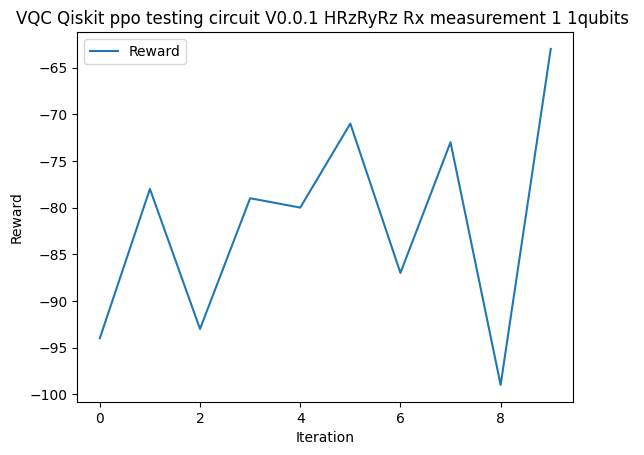

In [ ]:
EPISODES=10

# Set envoronment
env = gym.make(env_name)
env.seed(34)
num_inputs = env.observation_space.shape[0]
print("num_inputs",num_inputs)
num_actions = env.action_space.n
print("num_actions",num_actions)

#  for every episode
all_rewards = []
all_action_list = []
all_iteration_count = []

for e in range(EPISODES):
    done = False
    rewards = 0
    s1 = env.reset()
    episode_state = []
    episode_action = []
    count = 0
    while not done:
        episode_state.append(s1)
        state_angle = get_angles(s1)
        action = VQC().get_action(state_angle)
        episode_action.append(action)
        # s2: next state
        s2, reward, done, _ = env.step(action)
        s1 = s2
        rewards += reward
        count +=1
    all_iteration_count.append(count)
    all_rewards.append(rewards)

    print("\rEpisode {}/{} ||  Current Iteration Reward {}".format(e+1,EPISODES,rewards))
    print('episode_action is {}'.format(episode_action))

np.save("VQC Qiskit rewards", np.asarray(all_rewards))
print("all_action_list:", all_action_list)
print("all_iteration_count:", all_iteration_count)
plt.title("VQC Qiskit ppo testing circuit V0.0.1 HRzRyRz Rx measurement 1 1qubits ")
plt.plot(all_rewards, label='Reward')
plt.legend()
plt.ylabel('Reward')
plt.xlabel('Iteration')
plt.show()